<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

### no 1

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


### no 2

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

### no 3

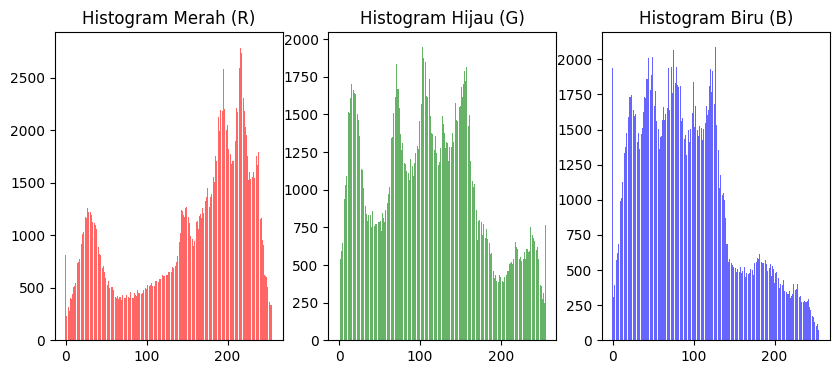

In [4]:
import cv2
img = cv2.imread('/content/drive/MyDrive/PCVK/images/lena.jpg')

r_hist = [0] * 256
g_hist = [0] * 256
b_hist = [0] * 256

for row in img:
    for pixel in row:
        r_hist[pixel[2]] += 1
        g_hist[pixel[1]] += 1
        b_hist[pixel[0]] += 1

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.bar(range(len(r_hist)), r_hist, color='red', alpha=0.6)
plt.title('Histogram Merah (R)')
plt.subplot(132)
plt.bar(range(len(g_hist)), g_hist, color='green', alpha=0.6)
plt.title('Histogram Hijau (G)')
plt.subplot(133)
plt.bar(range(len(b_hist)), b_hist, color='blue', alpha=0.6)
plt.title('Histogram Biru (B)')
plt.show()

### no 4

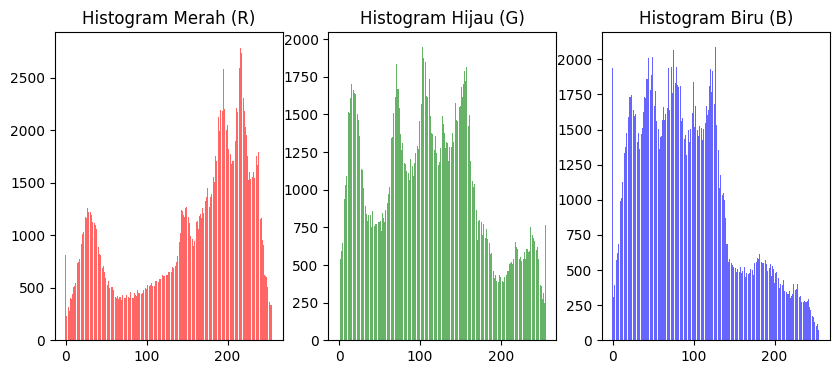

In [5]:
hist_r, bins_r = np.histogram(img[:, :, 0], bins=256, range=(0, 256))
hist_g, bins_g = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
hist_b, bins_b = np.histogram(img[:, :, 2], bins=256, range=(0, 256))

plt.figure(figsize=(10, 4))
plt.subplot(131)
plt.bar(range(len(r_hist)), r_hist, color='red', alpha=0.6)
plt.title('Histogram Merah (R)')
plt.subplot(132)
plt.bar(range(len(g_hist)), g_hist, color='green', alpha=0.6)
plt.title('Histogram Hijau (G)')
plt.subplot(133)
plt.bar(range(len(b_hist)), b_hist, color='blue', alpha=0.6)
plt.title('Histogram Biru (B)')
plt.show()

### no 5

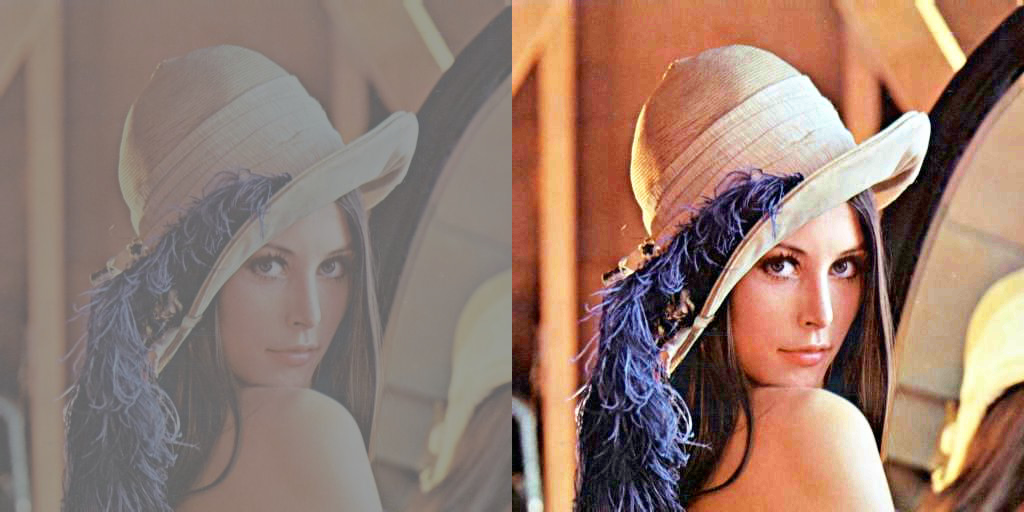

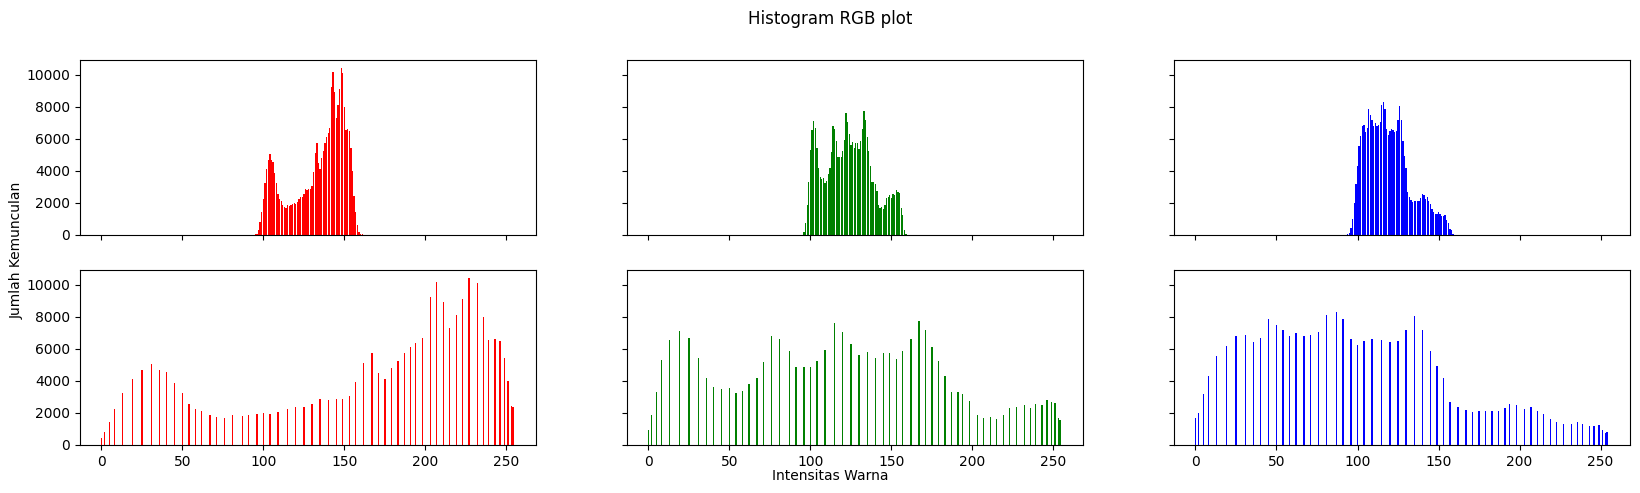

In [7]:
gambar1 = plt.imread('/content/drive/MyDrive/PCVK/images/lena_lc.jpg')
gambar2 = cv2.cvtColor(gambar1, cv2.COLOR_BGR2RGB)
names = np.arange(256)

def histog(gambar2):
    height, width, depth = np.shape(gambar2)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][gambar2[y][x][0]] += 1
            ax[1][gambar2[y][x][1]] += 1
            ax[2][gambar2[y][x][2]] += 1
    return ax

histo_asli = histog(gambar2)

#convert to Numpy array
img_array = np.asarray(gambar2)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((gambar2, img2)) #concatenate image
cv2_imshow(final_frame)
# Check if the image is grayscale or not
isgrayimg = len(np.unique(gambar2)) == 2  # Grayscale images have only 2 unique values

if not isgrayimg:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')

plt.show()

### no 6

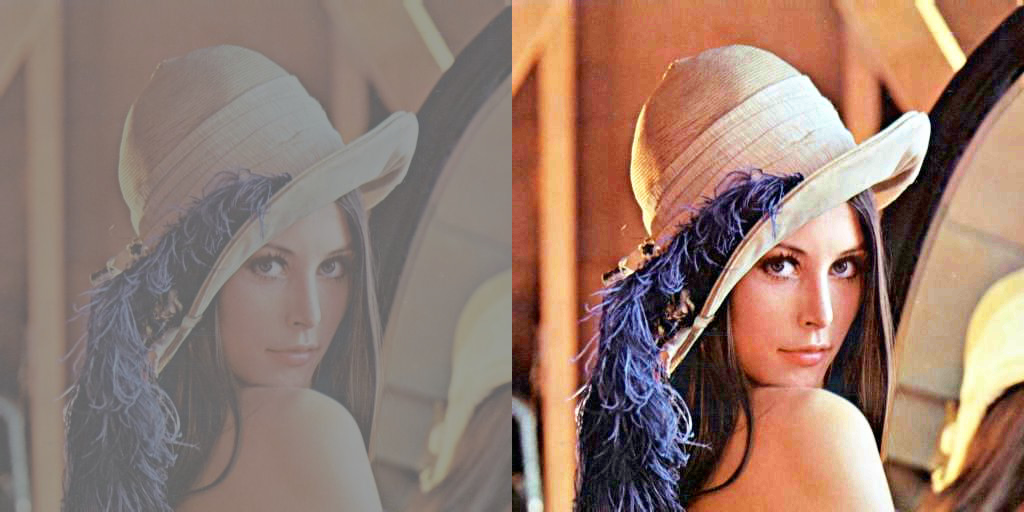

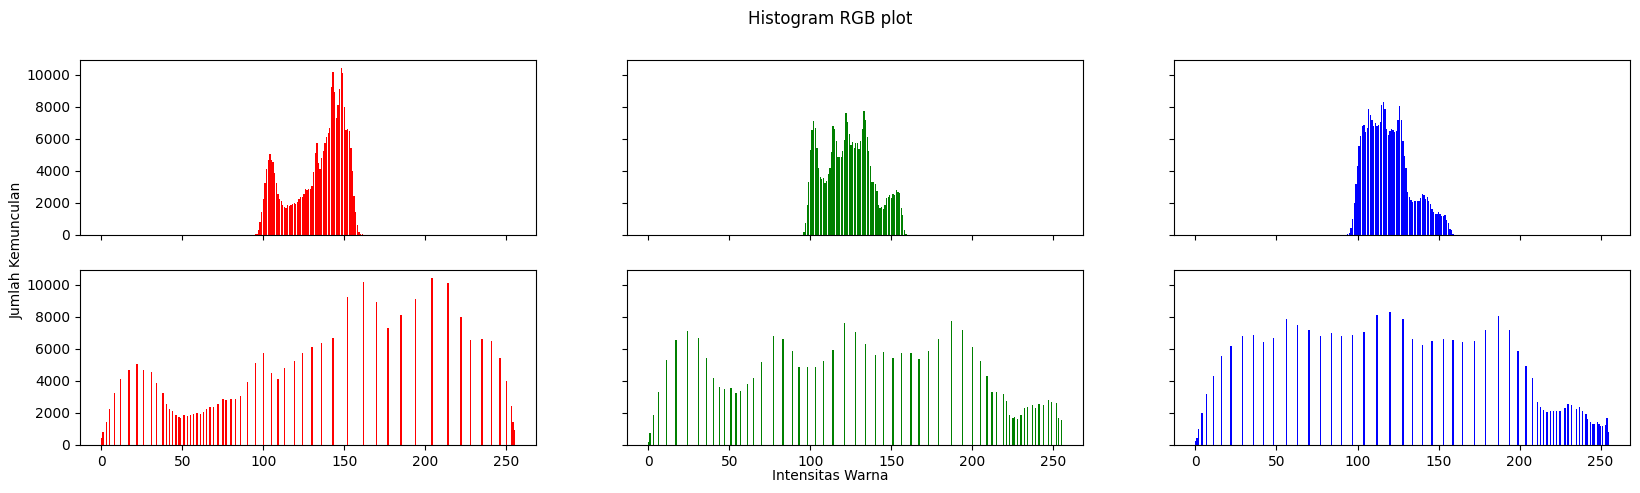

In [8]:
channels = cv.split(gambar2)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((gambar2, img2)) #concatenate image
cv2_imshow(final_frame)
# Check if the image is grayscale or not
isgrayimg = len(np.unique(gambar2)) == 2  # Grayscale images have only 2 unique values

if not isgrayimg:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[2], color='gray')
    axs[1].bar(names, equal_histo[2], color='gray')

plt.show()

### no 7

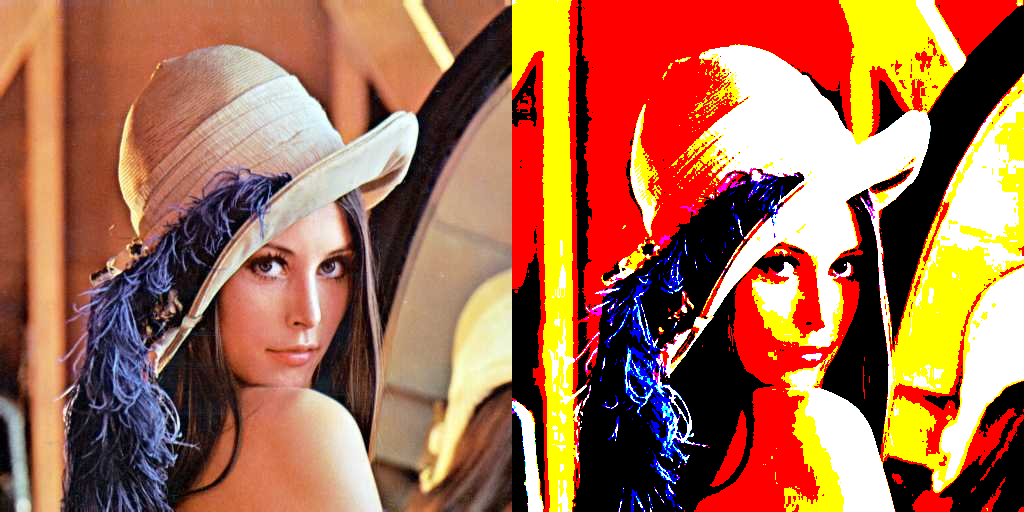

In [9]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

### no 8

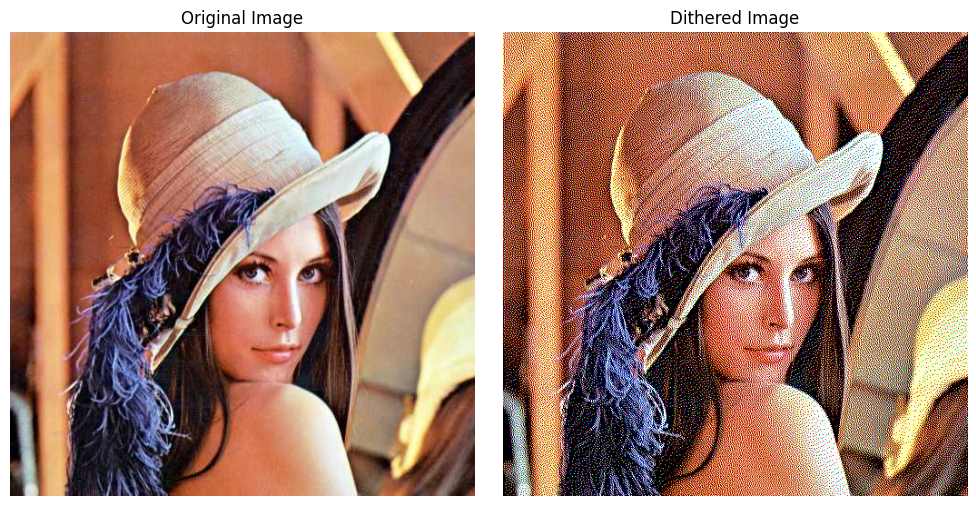

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

# Load the original input image
input_image_path = "/content/drive/MyDrive/PCVK/images/lena.jpg"
input_image = Image.open(input_image_path)

# Apply dithering
output_image = apply_dithering(input_image)

# Plotting the images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
gambaran2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(gambaran2)
plt.title('Original Image')
plt.axis('off')

# Plot the dithered image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Display the images
# cv2_imshow(input_image_path)
plt.tight_layout()
plt.show()

### no 9

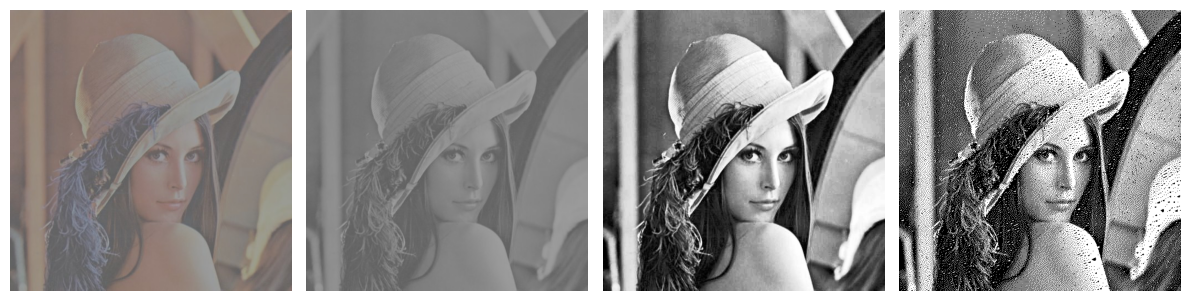

In [12]:
from cv2.gapi import equalizeHist
imgx = cv.imread('/content/drive/MyDrive/PCVK/images/lena_lc.jpg')
grayimg = cv.cvtColor(imgx, cv.COLOR_BGR2GRAY)
equ = cv.equalizeHist(grayimg.copy())
def floyd_steinberg_dithering(dx):
    height, width = dx.shape
    for y in range(height):
        for x in range(width):
            old_pixel = dx[y, x]
            new_pixel = 255 if old_pixel > 128 else 0  # Nilai ambang batas
            dx[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x < width - 1:
                dx[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                dx[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                dx[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                dx[y + 1, x + 1] += error * 1 / 16

    return dx
dithered = floyd_steinberg_dithering(equ.copy())

# menampilkan gambar

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].imshow(cv.cvtColor(imgx, cv.COLOR_BGR2RGB))
axes[1].imshow(cv.cvtColor(grayimg, cv.COLOR_BGR2RGB))
axes[2].imshow(cv.cvtColor(equ, cv.COLOR_BGR2RGB))
axes[3].imshow(cv.cvtColor(dithered, cv.COLOR_BGR2RGB))

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()